# Sarcasm Detection

In [73]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import string
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk.stem as stemmer

In [74]:
os.chdir("E:/Jerold/NLP Text Classification/NLP DataSet - Sarcasm Detection")

In [75]:
os.getcwd()

'E:\\Jerold\\NLP Text Classification\\NLP DataSet - Sarcasm Detection'

In [76]:
dat = pd.read_json("Sarcasm_Headlines_Dataset.json",lines=True)

In [77]:
dat.head(5)

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

In [78]:
#!pip install nltk
#!pip install textblob
#!pip install textmining
#!pip install vaderSentiment

Expectations from the student:
1. Find the 6 topics related to news article headlines.
2. Do EDA to find the top 50 sarcastic words. Make a word cloud for top 200 frequent words.
3. Can you identify sarcastic sentences? Can you distinguish between fake news and legitimate news? 

## 1. Find the 6 topics related to news article headlines.

In [79]:
# Here we are selecting the specific column that has the headlines of the news.
head_line = dat["headline"]
headline = pd.DataFrame(head_line)
type(headline)

pandas.core.frame.DataFrame

In [80]:
#Download the required repository
#nltk.download()

#Extract Stop words which is function available in TextMining library
stop_words=set(stopwords.words('english'))
stop_words.add("us")
stop_words.add("one")
stop_words.add("new")
stop_words.add("man")
stop_words.add("woman")
stop_words.add("women")
stop_words.add("men")
#Extract Punctuation Marks
exclude = set(string.punctuation)
type(stop_words)

set

In [81]:

#Text Preprocessing
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop_words])
    punc_free = "".join(i for i in stop_free if i not in exclude)
    num_free = "".join(i for i in punc_free if not i.isdigit())
    return num_free

In [82]:
lemmatizer = WordNetLemmatizer()
def lem(doc):
    lemm_output = ' '.join([lemmatizer.lemmatize(w) for w in doc])
    return lemm_output           

In [83]:
prepro = [clean(headline.iloc[i,0]) for i in range(0,headline.shape[0])]
preprocess = pd.DataFrame(prepro)
print(preprocess)

                                                       0
0      thirtysomething scientists unveil doomsday clo...
1      dem rep totally nails congress falling short g...
2             eat veggies  deliciously different recipes
3           inclement weather prevents liar getting work
4      mother comes pretty close using word streaming...
...                                                  ...
28614             jews celebrate rosh hashasha something
28615  internal affairs investigator disappointed con...
28616  beautiful acceptance speech week came queer ko...
28617  mars probe destroyed orbiting spielberggates s...
28618                            dad clarifies food stop

[28619 rows x 1 columns]


In [84]:
#prepros = [lem(preprocess.iloc[i,0]) for i in range(0,preprocess.shape[0])]
text=lem(prepro)
print(text)

thirtysomething scientists unveil doomsday clock hair loss dem rep totally nails congress falling short gender racial equality eat veggies  deliciously different recipes inclement weather prevents liar getting work mother comes pretty close using word streaming correctly white inheritance  ways file taxes less stress richard bransons globalwarming donation nearly much cost failed balloon trips shadow government getting large meet marriott conference room b lots parents know scenario lesbian considered father indiana and amazing that amanda peet told daughter sex a special hug know regarding current treatments ebola chris christie suggests hillary clinton blame boko harams kidnapping hundreds schoolgirls ford develops suv runs purely gasoline uber ceo travis kalanick stepping trump economic advisory council area boy enters jumpingandtouchingtopsofdoorways phase area traveling gurney leave person disabilities behind linmanuel miranda would like remind put phone away  journalists killed  

In [85]:
topic_words = text.split(" ")
print(topic_words)

['thirtysomething', 'scientists', 'unveil', 'doomsday', 'clock', 'hair', 'loss', 'dem', 'rep', 'totally', 'nails', 'congress', 'falling', 'short', 'gender', 'racial', 'equality', 'eat', 'veggies', '', 'deliciously', 'different', 'recipes', 'inclement', 'weather', 'prevents', 'liar', 'getting', 'work', 'mother', 'comes', 'pretty', 'close', 'using', 'word', 'streaming', 'correctly', 'white', 'inheritance', '', 'ways', 'file', 'taxes', 'less', 'stress', 'richard', 'bransons', 'globalwarming', 'donation', 'nearly', 'much', 'cost', 'failed', 'balloon', 'trips', 'shadow', 'government', 'getting', 'large', 'meet', 'marriott', 'conference', 'room', 'b', 'lots', 'parents', 'know', 'scenario', 'lesbian', 'considered', 'father', 'indiana', 'and', 'amazing', 'that', 'amanda', 'peet', 'told', 'daughter', 'sex', 'a', 'special', 'hug', 'know', 'regarding', 'current', 'treatments', 'ebola', 'chris', 'christie', 'suggests', 'hillary', 'clinton', 'blame', 'boko', 'harams', 'kidnapping', 'hundreds', 'sch

In [86]:
my_dict = {i:topic_words.count(i) for i in topic_words}
type(my_dict)

dict

In [87]:
my_dict

{'thirtysomething': 1,
 'scientists': 103,
 'unveil': 13,
 'doomsday': 5,
 'clock': 18,
 'hair': 59,
 'loss': 38,
 'dem': 4,
 'rep': 25,
 'totally': 55,
 'nails': 13,
 'congress': 140,
 'falling': 23,
 'short': 40,
 'gender': 26,
 'racial': 20,
 'equality': 25,
 'eat': 46,
 'veggies': 2,
 '': 4036,
 'deliciously': 1,
 'different': 64,
 'recipes': 30,
 'inclement': 2,
 'weather': 27,
 'prevents': 5,
 'liar': 8,
 'getting': 211,
 'work': 202,
 'mother': 84,
 'comes': 79,
 'pretty': 119,
 'close': 42,
 'using': 69,
 'word': 64,
 'streaming': 9,
 'correctly': 5,
 'white': 365,
 'inheritance': 3,
 'ways': 129,
 'file': 9,
 'taxes': 17,
 'less': 69,
 'stress': 29,
 'richard': 24,
 'bransons': 1,
 'globalwarming': 2,
 'donation': 13,
 'nearly': 39,
 'much': 144,
 'cost': 27,
 'failed': 31,
 'balloon': 12,
 'trips': 9,
 'shadow': 14,
 'government': 116,
 'large': 24,
 'meet': 86,
 'marriott': 1,
 'conference': 28,
 'room': 102,
 'b': 17,
 'lots': 14,
 'parents': 219,
 'know': 245,
 'scenario':

In [88]:
Topic = pd.DataFrame(my_dict,index=["Frequency"])
Topics=pd.DataFrame.transpose(Topic)
Topics.sort_values(by="Frequency",inplace=True,ascending=False)
Topics = Topics.iloc[1:]
Topics.head(6)

Frequency
trump        1389
report        604
area          494
day           493
says          485
donald        475

Thus, The Top 6 topic words that are related to the news article headlines are "TRUMP", "REPORT", "AREA", "Day", "Says" and "Donald".

## 2. Do EDA to find the top 50 sarcastic words. Make a word cloud for top 200 frequent words.

To find the top 50 sarcastic words, we need to filter-out the sarcastic words alone. 
Make a word cloud for top 200 frequent words.

In [89]:
#Filtering out only Sarcastic words.

In [90]:
def top_200(tp):
    tp_200 = tp.head(200)
    top_200 = (tp_200.index)
    top_200 = top_200.tolist()
    wordcloud = WordCloud(width=1000, height=500,background_color="snow").generate(' '.join(top_200))
    wordcloud.to_file("WordCloud.png")
    plt.figure(figsize = (15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

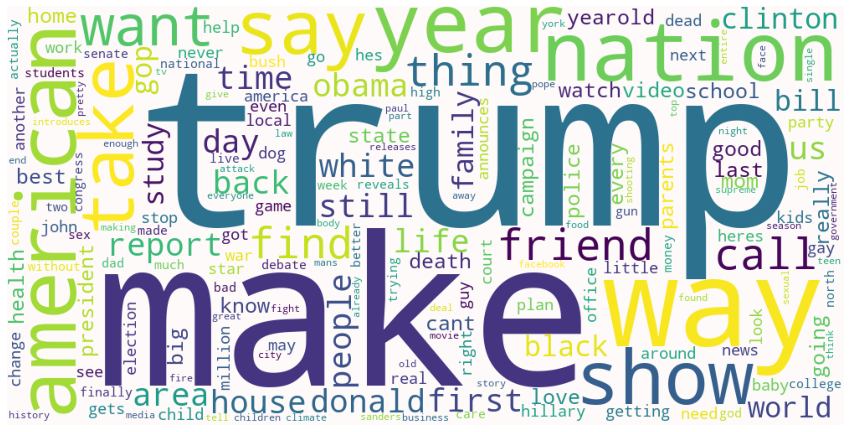

In [91]:
top_200(Topics)

In [92]:
Top_50 = pd.DataFrame()
text = pd.DataFrame(Topics.index)
type(text)

pandas.core.frame.DataFrame

In [93]:
for i in range (0, text.shape[0]):
    #print(i)
    blob = TextBlob(text.iloc[i,0])
    temp = pd.DataFrame({'Topic':text.iloc[i,0],'Polarity':blob.sentiment.polarity},index=[0])
    Top_50 = Top_50.append(temp)

In [94]:
Top_1 = Top_50.sort_values(by=['Polarity'],ascending=True)
Top_50_Sarc = Top_1.head(50)
Top_50_Sarc.head(5)

Topic  Polarity
0   gruesome      -1.0
0    cruelly      -1.0
0  insulting      -1.0
0      nasty      -1.0
0   pathetic      -1.0

In [95]:
Top50_words = Top_50_Sarc['Topic'].tolist()
print("The Top 50 Sarcastic words are : ")
print(Top50_words)

The Top 50 Sarcastic words are : 
['gruesome', 'cruelly', 'insulting', 'nasty', 'pathetic', 'cruel', 'outrageously', 'devastating', 'evil', 'boring', 'insane', 'viciously', 'insanely', 'worst', 'ruthless', 'horrific', 'horrible', 'awfully', 'horribly', 'hysterically', 'terrifying', 'ruthlessly', 'awful', 'shocking', 'vicious', 'disgusted', 'terribly', 'disgusting', 'menacing', 'grimly', 'terrible', 'miserable', 'bleak', 'grim', 'shockingly', 'outrageous', 'frigid', 'horrifying', 'outraged', 'fearful', 'inhumane', 'hated', 'brutally', 'brutal', 'annoyingly', 'crap', 'appalled', 'bloody', 'imbecile', 'hate']


The Top 50 Sarcastic words are : 'gruesome', 'cruelly', 'insulting', 'nasty', 'pathetic', 'cruel', 'outrageously', 'devastating', 'evil', 'boring', 'insane', 'viciously', 'insanely', 'worst', 'ruthless', 'horrific', 'horrible', 'awfully', 'horribly', 'hysterically', 'terrifying', 'ruthlessly', 'awful', 'shocking', 'vicious', 'disgusted', 'terribly', 'disgusting', 'menacing', 'grimly', 'terrible', 'miserable', 'bleak', 'grim', 'shockingly', 'outrageous', 'frigid', 'horrifying', 'outraged', 'fearful', 'inhumane', 'hated', 'brutally', 'brutal', 'annoyingly', 'crap', 'appalled', 'bloody', 'imbecile', 'hate'

##  3. Idnetify Sarcastic News and Differentiate it from Legitimate News

In [96]:
dat.head(3)

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...

In [119]:
Filter = dat.loc[(dat['is_sarcastic']==1)]
Filter.head(3)

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

In [98]:
filter_headline = pd.DataFrame(Filter['headline'])

In [99]:
type(filter_headline)

pandas.core.frame.DataFrame

In [100]:
print(filter_headline)

                                                headline
0      thirtysomething scientists unveil doomsday clo...
3      inclement weather prevents liar from getting t...
4      mother comes pretty close to using word 'strea...
7      richard branson's global-warming donation near...
8      shadow government getting too large to meet in...
...                                                  ...
28612  polish rapper under fire for use of the word '...
28614       jews to celebrate rosh hashasha or something
28615  internal affairs investigator disappointed con...
28617  mars probe destroyed by orbiting spielberg-gat...
28618                 dad clarifies this not a food stop

[13634 rows x 1 columns]


In [101]:
tp1 = filter_headline["headline"].tolist()
print(tp1)

['thirtysomething scientists unveil doomsday clock of hair loss', 'inclement weather prevents liar from getting to work', "mother comes pretty close to using word 'streaming' correctly", "richard branson's global-warming donation nearly as much as cost of failed balloon trips", 'shadow government getting too large to meet in marriott conference room b', 'ford develops new suv that runs purely on gasoline', 'area boy enters jumping-and-touching-tops-of-doorways phase', 'area man does most of his traveling by gurney', 'guard in video game under strict orders to repeatedly pace same stretch of hallway', 'secret service agent not so secret about being david alan grier fan', 'leading probability researchers confounded by three coworkers wearing same shirt color on same day', "new york introduces shoe-sharing program for city's pedestrians", 'expansive obama state of the union speech to touch on patent law, entomology, the films of robert altman', 'naacp demands less minority representation 

## Sentiment Analysis using VADER

In [102]:
#Sentiment Analysis using Vader
#Creating empty dataframe to store results
Final_Result_Vadar = pd.DataFrame()

#create engine
analyzer = SentimentIntensityAnalyzer()

In [157]:
for i in range(0,filter_headline.shape[0]):
    #print(i)
    snt = analyzer.polarity_scores(tp1[i])
    temp = pd.DataFrame({'Headline':filter_headline.iloc[i,0],'Polarity':snt.items()}, index=[0])
    Final_Result_Vadar = Final_Result_Vadar.append(temp) 

print(Final_Result_Vadar)

                                             Headline  \
0   thirtysomething scientists unveil doomsday clo...   
0   inclement weather prevents liar from getting t...   
0   mother comes pretty close to using word 'strea...   
0   richard branson's global-warming donation near...   
0   shadow government getting too large to meet in...   
..                                                ...   
0   polish rapper under fire for use of the word '...   
0        jews to celebrate rosh hashasha or something   
0   internal affairs investigator disappointed con...   
0   mars probe destroyed by orbiting spielberg-gat...   
0                  dad clarifies this not a food stop   

                                             Polarity  
0   ((neg, 0.504), (neu, 0.496), (pos, 0.0), (comp...  
0   ((neg, 0.311), (neu, 0.566), (pos, 0.123), (co...  
0   ((neg, 0.0), (neu, 0.714), (pos, 0.286), (comp...  
0   ((neg, 0.216), (neu, 0.784), (pos, 0.0), (comp...  
0   ((neg, 0.0), (neu, 1.0), (pos, 

In [175]:
Final_Result_Vadar['Polarity'].iloc[1]

dict_items([('neg', 0.311), ('neu', 0.566), ('pos', 0.123), ('compound', -0.4588)])